In [1]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        "Generowanie losowych wag z ziarnem(np 1 są już ustawione domyślne wagi)"
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        """obliczanie najmniejszych odchyleń
            loc: średnia rozkładu
            scale: rozpiętość rozkładu
            size: jeżeli rozmiar jest domyślny nic nie zmienia jeżeli inny jest zmieniany wzorem(shape 2 wartość w tablicy)
                """
        self.errors_ = []
        """Lista aktualizacji podczas danego przejazdu funkcji"""

        for _ in range(self.n_iter):
            errors = 0
            
            """czy xi(dane) są równe targetowi(-1 bądź 1)"""

            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                """aktualizacja wag(dąży do 1 lub -1 w zależności od rekordu) = współczynnik uczenia * aktualizacja wagi"""
                self.w_[1:] += update * xi
                """aktualizacja wag"""
                self.w_[0] += update 
                """obciążenie jednostkowe"""
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X):
        """ do jakiego kwaita dążą wartości, gdzie wynik net_input jest równy bądź większy od zera wzróć 1 w innym przypdaku -1(zwraca etykiete klas)"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)   
    
    def net_input(self, X):
        """(oblicza całkowite pobudzenie, mnożenie macierzy) obliczanie o ile waga musi sie zmienic"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Pobranie i oczyszczanie danych

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Hawks.csv')

'''Pobieranie danych'''

df = df[(df.Species == 'SS') | (df.Species == 'RT')]

'''Wybór danych tylko tam gdzie są gatunki SS lub RT'''

y = df.Species.values

'''Pobranie targetów'''

y = np.where(y == 'SS', 1, -1)

'''Przypisanie targetom wartości 1 lub -1 w zależności jaki to gatunek'''

X = df[['Wing', 'Tail']].values

'''Pobranie wartości z kolumn'''

# Podział na dane treningowe i testowe

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, stratify=y)

'''Podział na dane treningowe i testowe w zależności 70 do 30'''

'Podział na dane treningowe i testowe w zależności 70 do 30'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

'''Standaryzacja danych'''

ppn = Perceptron(eta=0.01, n_iter=10)

ppn.fit(X_train_std, y_train)

'''Trenowanie modelu'''

y_pred = ppn.predict(X_test_std)
print(f"Nieprawidłowo sklasyfikowane próbki: { (y_test != y_pred).sum() }")

print(f"Dokładnośc wynosi {accuracy_score(y_test, y_pred)}")

'''Sprawdzenie dokładności modelu'''

Nieprawidłowo sklasyfikowane próbki: 2
Dokładnośc wynosi 0.9920634920634921


'Sprawdzenie dokładności modelu'

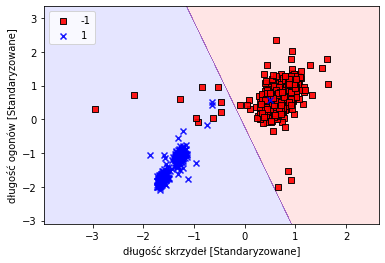

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.002):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    '''Określenie znaczników'''

    
    '''Rysuje powierzchnie decyzyjną'''
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    
    '''Rysuje wykres próbek'''
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.9, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')


"""Połączenie tablic"""
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


"""Rysowanie"""
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn)

plt.xlabel('długość skrzydeł [Standaryzowane]')
plt.ylabel('długość ogonów [Standaryzowane]')
plt.legend(loc='upper left')

plt.show()